In [133]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO("/kaggle/input/smart-luggage-system/smart_luggage_system/yolov8x.pt")


0: 640x480 1 umbrella, 1 bottle, 1 cup, 1 bed, 1 laptop, 1 cell phone, 1 book, 1942.1ms
Speed: 4.3ms preprocess, 1942.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


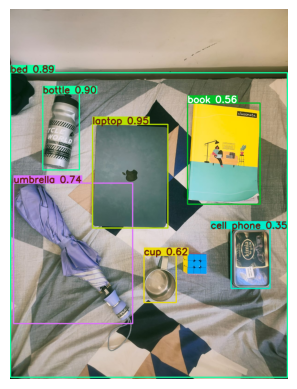

In [134]:
test_image_path = "/kaggle/input/smart-luggage-system/smart_luggage_system/utilities/objects.jpeg"
image = Image.open(test_image_path)
image = np.array(image)   
 
results = model(image_np)
final_image = results[0].plot()
plt.imshow(final_image)
plt.axis("off")  
plt.show()


In [135]:
objects_dict = {
    'cell phone': 1,
    'bed': 1,
    'bottle': 1,
    'laptop': 0,
    'book': 1,
    'umbrella': 1,
    'cup': 1
}
# 1 means allowed and 0 means not allowed

In [142]:
image_copy = image.copy()
boxes = results[0].boxes
for box in boxes:
    obj_label = box.cls.item()
    obj_name = results[0].names[obj_label]
    allowed = 'YES' if objects_dict[obj_name] == 1 else 'NO'
    print(f"Object : {obj_name} \t Allowed: {allowed}")
    x1,y1,x2,y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())
    color = (0,255,0) if allowed == 'YES' else (255,0,0)
    cv2.rectangle(image_copy , (x1,y1) , (x2,y2) , color , 3)
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(image_copy,obj_name,(x1,y1), font,2, color,2)
    cv2.putText(image_copy,allowed,(x1+10,y1+60), font,2, color,2)

Object : laptop 	 Allowed: NO
Object : bottle 	 Allowed: YES
Object : bed 	 Allowed: YES
Object : umbrella 	 Allowed: YES
Object : cup 	 Allowed: YES
Object : book 	 Allowed: YES
Object : cell phone 	 Allowed: YES


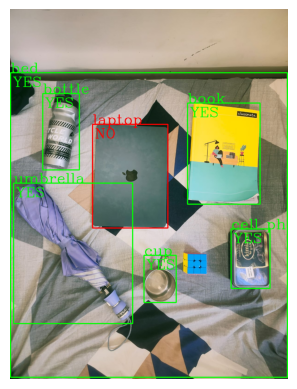

In [143]:
plt.imshow(image_copy)
plt.axis("off")  
plt.show()